In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [8]:
warnings.filterwarnings('ignore',category=FutureWarning)
data=pd.read_csv( r"C:\Users\KANAK\Desktop\CarPrice.csv")

In [9]:
data.head()
data.tail()
data.describe()
data.info()
data.shape
data.isnull().sum()
data.duplicated().sum()
print(data.price.describe(percentiles=[0.225,0.50,0.75,0.85,0.98,1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

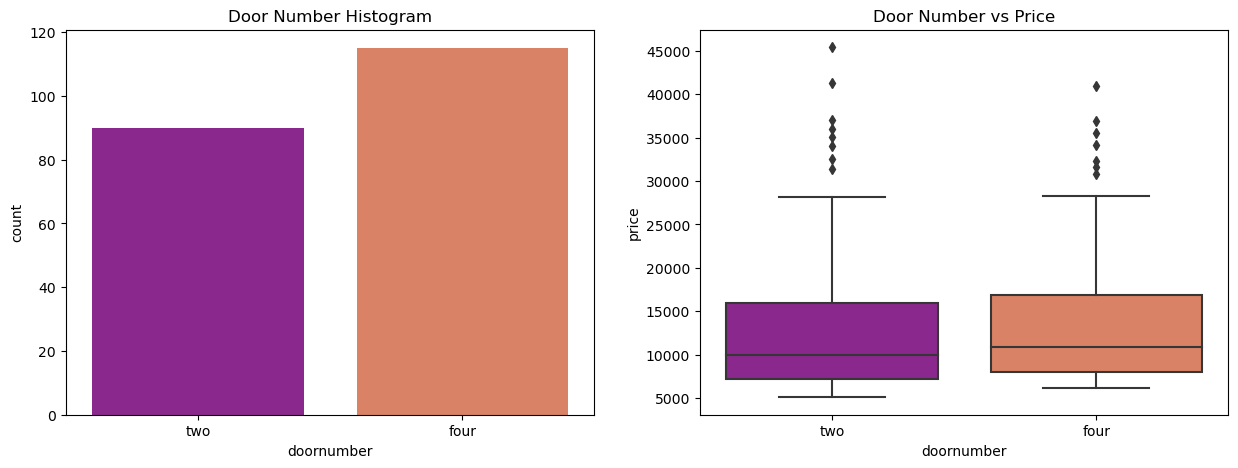

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(data.doornumber,palette=("plasma"))
plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=data.doornumber,y=data.price,palette=("plasma"))
plt.show()

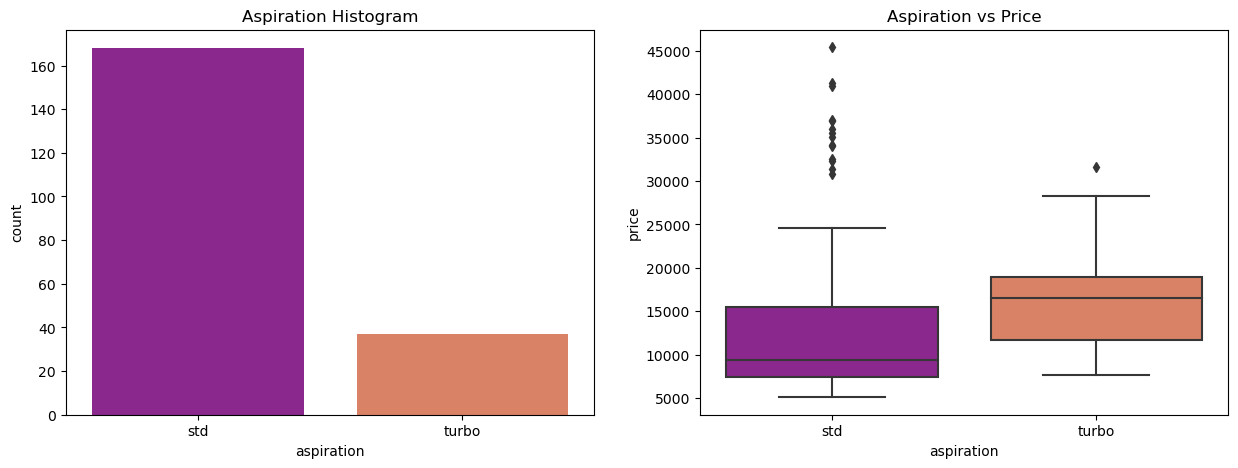

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(data.aspiration,palette=('plasma'))
plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=data.aspiration,y=data.price,palette=("plasma"))
plt.show()

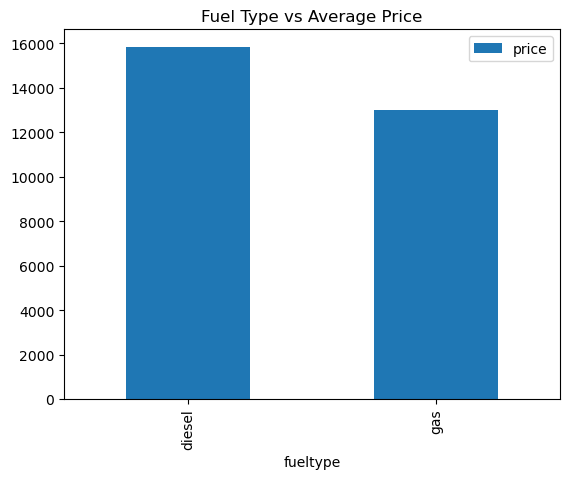

In [12]:
df=pd.DataFrame(data.groupby(['fueltype'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

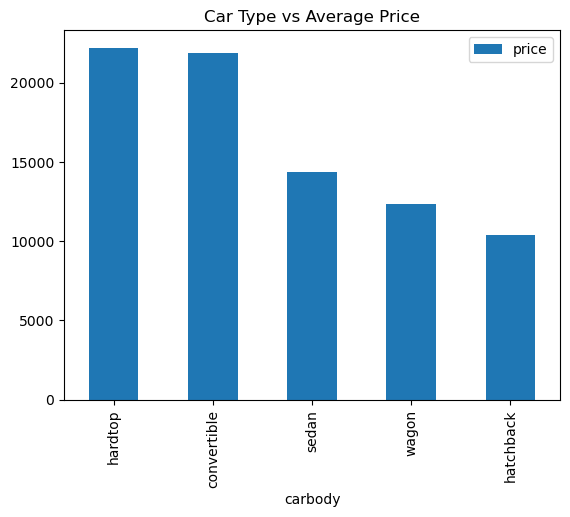

In [13]:
df=pd.DataFrame(data.groupby(['carbody'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

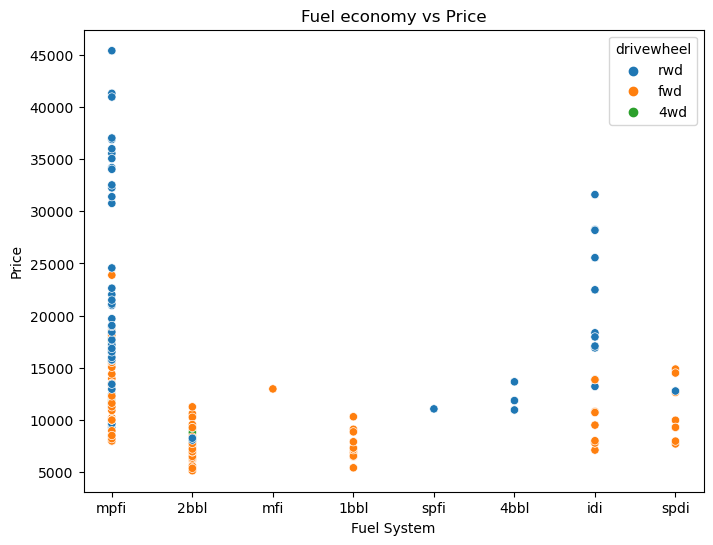

In [14]:
plt.figure(figsize=(8,6))
plt.title('Fuel economy vs Price')
sns.scatterplot(x=data['fuelsystem'],y=data['price'],hue=data['drivewheel'])
plt.xlabel('Fuel System')
plt.ylabel('Price')
plt.show()

In [15]:
plt.tight_layout()
predict="price"
data=data[["symboling","wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]]
x=np.array(data.drop([predict],1))
y=np.array(data[predict])
print(x)
print(y)

[[ 3.000e+00  8.860e+01  1.688e+02 ...  5.000e+03  2.100e+01  2.700e+01]
 [ 3.000e+00  8.860e+01  1.688e+02 ...  5.000e+03  2.100e+01  2.700e+01]
 [ 1.000e+00  9.450e+01  1.712e+02 ...  5.000e+03  1.900e+01  2.600e+01]
 ...
 [-1.000e+00  1.091e+02  1.888e+02 ...  5.500e+03  1.800e+01  2.300e+01]
 [-1.000e+00  1.091e+02  1.888e+02 ...  4.800e+03  2.600e+01  2.700e+01]
 [-1.000e+00  1.091e+02  1.888e+02 ...  5.400e+03  1.900e+01  2.500e+01]]
[13495.    16500.    16500.    13950.    17450.    15250.    17710.
 18920.    23875.    17859.167 16430.    16925.    20970.    21105.
 24565.    30760.    41315.    36880.     5151.     6295.     6575.
  5572.     6377.     7957.     6229.     6692.     7609.     8558.
  8921.    12964.     6479.     6855.     5399.     6529.     7129.
  7295.     7295.     7895.     9095.     8845.    10295.    12945.
 10345.     6785.     8916.5    8916.5   11048.    32250.    35550.
 36000.     5195.     6095.     6795.     6695.     7395.    10945.
 11845.    1

<Figure size 640x480 with 0 Axes>

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=100)

In [17]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(xtrain,ytrain)
predictions=model.predict(xtest)

In [18]:
from sklearn.metrics import mean_absolute_error
model.score(xtest,predictions)

1.0